VÍ DỤ 1

In [115]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)
means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 30
X0 = np.random.multivariate_normal(means[0], cov, N).T
X1 = np.random.multivariate_normal(means[1], cov, N).T

X = np.concatenate((X0, X1), axis = 1)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1)
# Xbar
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)

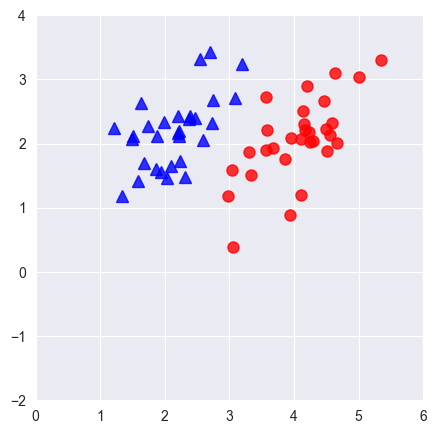

In [116]:
fig, ax = plt.subplots(figsize=(5, 5))
ani = plt.cla()
#plot points
ani = plt.plot(X0[0, :], X0[1, :], 'b^', markersize = 8, alpha = .8)
ani = plt.plot(X1[0, :], X1[1, :], 'ro', markersize = 8, alpha = .8)
ani = plt.axis([0 , 6, -2, 4])
plt.show()

In [117]:
# Define h_w(x):= W^T.x + w_0 = \bar{W}^T . \bar{x}
def h(w, x):
    return np.sign(np.dot(w.T, x))

In [118]:
#Stop condition
def has_converged(X, y, w):
    return np.array_equal(h(w, X), y) #True if h(w, X) == y else False

In [119]:
def perceptron(X, y, w_init):
    w = [w_init]
    N = X.shape[1]
    mis_points = [] # set of miss position points
    while True:
    # mix data
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(3, 1)
            yi = y[0, mix_id[i]]
            if h(w[-1], xi)[0] != yi:
                mis_points.append(mix_id[i])
                w_new = w[-1] + yi*xi
                w.append(w_new)
        if has_converged(X, y, w[-1]):
            break
    return (w, mis_points)

In [120]:
d = X.shape[0]
w_init = np.random.randn(d, 1)
(w, m) = perceptron(X, y, w_init)
print(w[-1])

[[ 13.97858527]
 [-15.02901929]
 [ 14.38743059]]


In [121]:
def draw_line(w):
    w0, w1, w2 = w[0], w[1], w[2]
    if w2 != 0:
        x11, x12 = -100, 100
        return plt.plot([x11, x12], [-(w1*x11 + w0)/w2, -(w1*x12 + w0)/w2], 'k')
    else:
        x10 = -w0/w1
        return plt.plot([x10, x10], [-100, 100], 'k')

MovieWriter imagemagick unavailable; using Pillow instead.


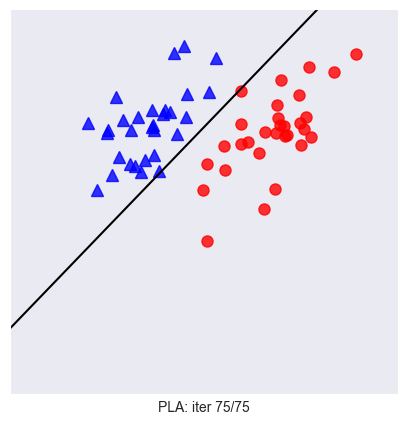

In [122]:
## Visualization
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
def viz_alg_1d_2(w):
    it = len(w)
    fig, ax = plt.subplots(figsize=(5, 5))
    def update(i):
        ani = plt.cla()
        #points
        ani = plt.plot(X0[0, :], X0[1, :], 'b^', markersize = 8, alpha = .8)
        ani = plt.plot(X1[0, :], X1[1, :], 'ro', markersize = 8, alpha = .8)
        ani = plt.axis([0 , 6, -2, 4])
        i2 = i if i < it else it-1
        ani = draw_line(w[i2])
        if i < it-1:
# draw one misclassified point
            circle = plt.Circle((X[1, m[i]], X[2, m[i]]), 0.15, color='k', fill =
False)
            ax.add_artist(circle)
# hide axis
        cur_axes = plt.gca()
        cur_axes.axes.get_xaxis().set_ticks([])
        cur_axes.axes.get_yaxis().set_ticks([])
        label = 'PLA: iter %d/%d' %(i2, it-1)
        ax.set_xlabel(label)
        return ani, ax
    anim = FuncAnimation(fig, update, frames=np.arange(0, it + 2), interval=1000)
# save
    anim.save('D:\\pla_vis.gif', dpi = 100, writer = 'imagemagick')
    plt.show()
viz_alg_1d_2(w)

VÍ DỤ 2:

In [123]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns

main_df = pd.read_csv('/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab8/sonar.all-data (1).csv',header=None)
main_df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


<Axes: ylabel='60'>

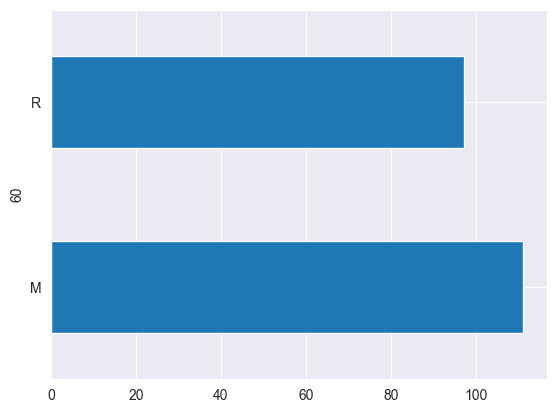

In [124]:
main_df[60].value_counts().plot(kind = 'barh')

In [125]:
y_df = main_df[60]
targes_label = {'M': 1,'R': -1}
targes_df = [targes_label[item] for item in y_df]
print(targes_df)

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [126]:
inputs_df = main_df.drop(60, axis=1)

In [127]:
inputs_df = main_df.drop(60, axis=1)
x0 = np.ones((inputs_df.shape[0], 1))
X = np.concatenate((x0, inputs_df), axis = 1)

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, targes_df, test_size=0.30,
random_state=42)

BÀI TẬP TỰ THỰC HÀNH

a) Tiếp theo, các bạn hãy sử dụng các hàm đã có ở Ví dụ 1, sau đó huấn luyện mô hình bằng tập dữ liệu X_train, y_train. Chú ý chúng ta cần bỏ qua các phần lệnh phục vụ việc hiển thị kết quả dạng hình vẽ.

In [129]:
# Define h_w(x):= W^T.x + w_0 = \bar{W}^T . \bar{x}
def h(w, x):
    return np.sign(np.dot(w.T, x))

In [130]:
# Define h_w(x):= W^T.x + w_0 = \bar{W}^T . \bar{x}
def h(w, x):
    return np.sign(np.dot(w.T, x))

Vòng lặp chính tìm đường phân chia (bộ hệ số W) theo phương pháp Gradient Descent

In [131]:
# Điều kiện dừng: Kiểm tra nếu không còn điểm nào sai
def has_converged(X, y, w):
    predictions = np.sign(np.dot(X, w))
    return np.all(predictions == y)

# Thuật toán Perceptron (thêm số vòng lặp tối đa)
def perceptron(X, y, w_init, max_iter=1000):
    w = w_init.copy()
    N = X.shape[0]
    for _ in range(max_iter):  # Giới hạn số vòng lặp
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[i].reshape(-1, 1)
            yi = y[i]
            if h(w, xi)[0] != yi:
                w += yi * xi
        if has_converged(X, y, w):
            break
    return w

Gọi hàm lặp và in ra kết quả là bộ trọng số W ở vòng lặp cuối

In [132]:
import time
d = X_train.shape[1]
w_init = np.random.randn(d, 1)
# Huấn luyện mô hình Perceptron
start_time = time.time()
w_final = perceptron(X_train, np.array(y_train).reshape(-1, 1), w_init)
perceptron_time = time.time() - start_time
# print(w_final)

(b) Viết bổ sung phần chương trình thực hiện việc chạy test với bộ hệ số đã có và tính độ chính xác bằng accuracy, recall và và precision.


Accuracy của mô hình với Perceptron: 0.7936507936507936
Recall của mô hình với Perceptron: 0.7142857142857143
Precision của mô hình với Perceptron: 0.8928571428571429


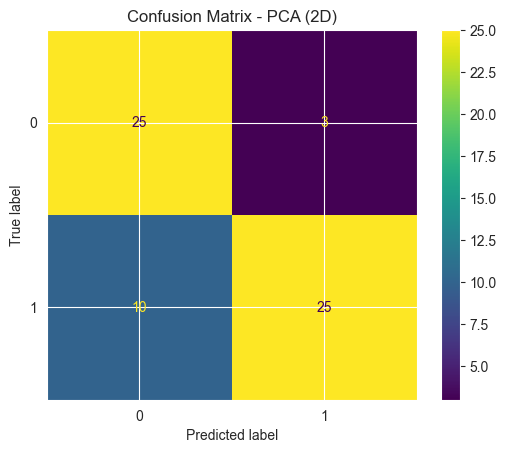

In [133]:
from sklearn.metrics import accuracy_score, recall_score, ConfusionMatrixDisplay, confusion_matrix, precision_score

y_pred_perceptron = np.array([h(w_final, x.reshape(-1, 1))[0] for x in X_test])

# Đánh giá mô hình Perceptron
acc_perceptron = accuracy_score(y_test, y_pred_perceptron)
print("Accuracy của mô hình với Perceptron:", acc_perceptron)
recall_perceptron = recall_score(y_test, y_pred_perceptron)
print("Recall của mô hình với Perceptron:", recall_perceptron)
precision_perceptron = precision_score(y_test, y_pred_perceptron)
print("Precision của mô hình với Perceptron:", precision_perceptron)

# Vẽ confusion matrix cho PCA
cm_pca = confusion_matrix(y_test, y_pred_perceptron)
disp_pca = ConfusionMatrixDisplay(confusion_matrix=cm_pca)
disp_pca.plot()
plt.title("Confusion Matrix - PCA (2D)")
plt.show()

(c) Vẫn phân chia bộ dữ liệu như trong ý trên, sau đó thực nghiệm dự đoán trên các tập với mô hình Logistic và Naïve Bayess

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Huấn luyện và đánh giá mô hình Logistic Regression
logistic = LogisticRegression()
start_time = time.time()
logistic.fit(X_train, y_train)
logistic_time = time.time() - start_time

y_pred_logistic = logistic.predict(X_test)
acc_logistic = accuracy_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)

# Huấn luyện và đánh giá mô hình Naïve Bayes
naive_bayes = GaussianNB()
start_time = time.time()
naive_bayes.fit(X_train, y_train)
nb_time = time.time() - start_time

y_pred_nb = naive_bayes.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)

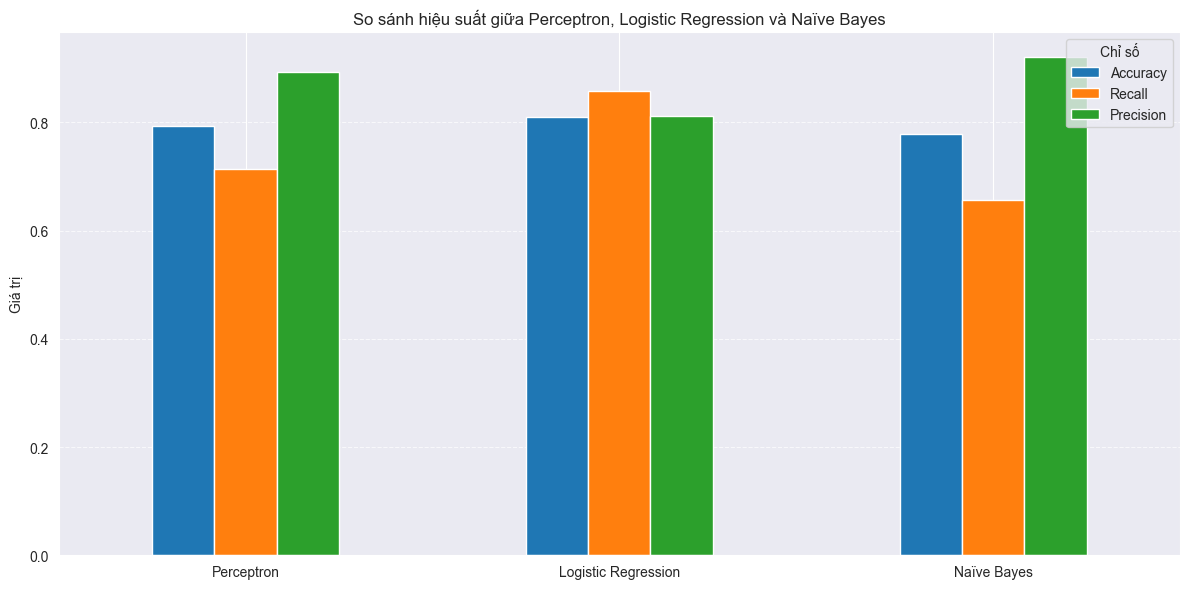

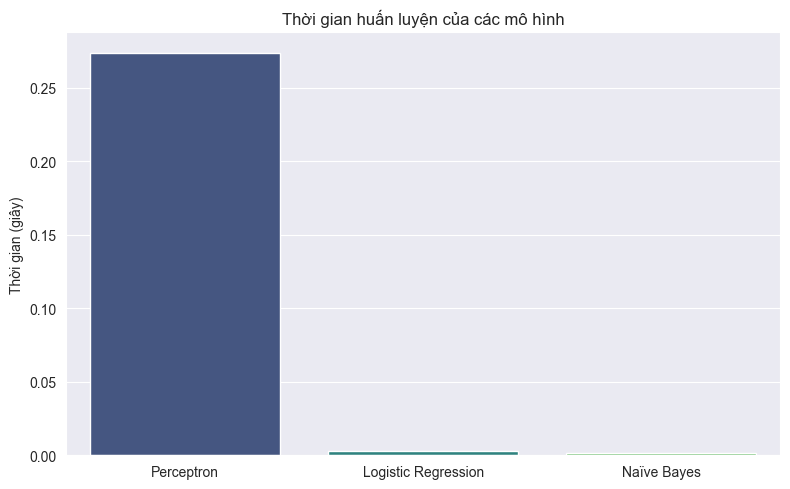

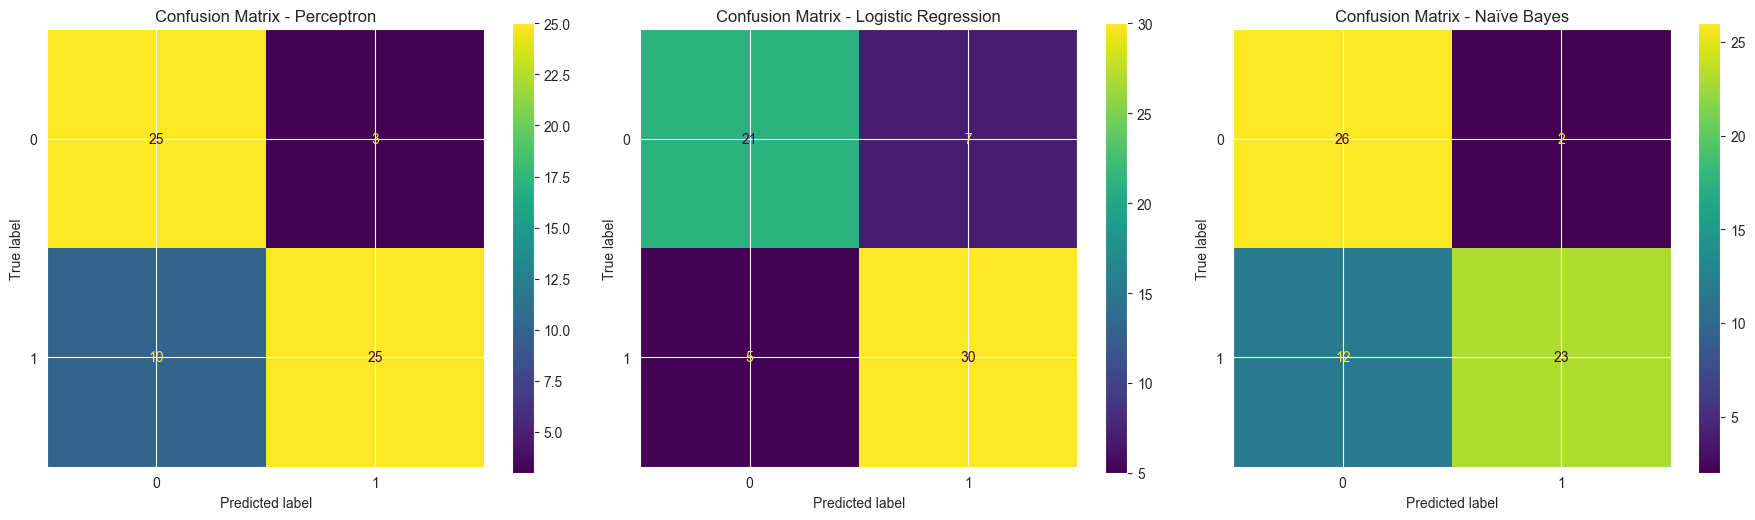

Perceptron:
Accuracy: 0.7937, Recall: 0.7143, Precision: 0.8929, Time: 0.2740s
Logistic Regression:
Accuracy: 0.8095, Recall: 0.8571, Precision: 0.8108, Time: 0.0029s
Naïve Bayes:
Accuracy: 0.7778, Recall: 0.6571, Precision: 0.9200, Time: 0.0013s


In [135]:
models = ['Perceptron', 'Logistic Regression', 'Naïve Bayes']
metrics = {
    'Accuracy': [acc_perceptron, acc_logistic, acc_nb],
    'Recall': [recall_perceptron, recall_logistic, recall_nb],
    'Precision': [precision_perceptron, precision_logistic, precision_nb],
    'Training Time (s)': [perceptron_time, logistic_time, nb_time]
}

# Tạo DataFrame để trực quan hóa
df_metrics = pd.DataFrame(metrics, index=models)

# Biểu đồ cột so sánh các chỉ số
plt.figure(figsize=(12, 6))
df_metrics[['Accuracy', 'Recall', 'Precision']].plot(kind='bar', ax=plt.gca())
plt.title('So sánh hiệu suất giữa Perceptron, Logistic Regression và Naïve Bayes')
plt.ylabel('Giá trị')
plt.xticks(rotation=0)
plt.legend(title='Chỉ số')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Biểu đồ cột thời gian huấn luyện
plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=[perceptron_time, logistic_time, nb_time], hue=models, palette='viridis', legend=False)
plt.title('Thời gian huấn luyện của các mô hình')
plt.ylabel('Thời gian (giây)')
plt.tight_layout()
plt.show()

# Vẽ Confusion Matrix cho từng mô hình
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, y_pred, title in zip(axes, [y_pred_perceptron, y_pred_logistic, y_pred_nb], models):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax)
    ax.set_title(f"Confusion Matrix - {title}")
plt.tight_layout()
plt.show()

# In kết quả
print("Perceptron:")
print(f"Accuracy: {acc_perceptron:.4f}, Recall: {recall_perceptron:.4f}, Precision: {precision_perceptron:.4f}, Time: {perceptron_time:.4f}s")
print("Logistic Regression:")
print(f"Accuracy: {acc_logistic:.4f}, Recall: {recall_logistic:.4f}, Precision: {precision_logistic:.4f}, Time: {logistic_time:.4f}s")
print("Naïve Bayes:")
print(f"Accuracy: {acc_nb:.4f}, Recall: {recall_nb:.4f}, Precision: {precision_nb:.4f}, Time: {nb_time:.4f}s")

VÍ DỤ 3:

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Load dữ liệu Breast Cancer
cancer_data = datasets.load_breast_cancer()
X = cancer_data.data        # 569 mẫu, 30 đặc trưng
y = cancer_data.target      # 0 = B (lành tính), 1 = M (ác tính)

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109)

# Thêm bias cho Perceptron
X_train_bias = np.concatenate((np.ones((X_train.shape[0],1)), X_train), axis=1)
X_test_bias = np.concatenate((np.ones((X_test.shape[0],1)), X_test), axis=1)


Huấn luyện Perceptron

In [137]:
# Hàm Perceptron
def fit_perceptron(X, y, lr=0.01, epochs=100):
    # Chuyển y từ {0,1} sang {-1,1}
    y_new = np.where(y==0, -1, 1)
    w = np.zeros(X.shape[1])
    for epoch in range(epochs):
        for i in range(len(y)):
            if y_new[i] * np.dot(X[i], w) <= 0:
                w += lr * y_new[i] * X[i]
    return w

def predict_perceptron(X, w):
    return np.sign(np.dot(X, w))

# Huấn luyện
w = fit_perceptron(X_train_bias, y_train)

# Dự đoán
y_pred_train = np.where(predict_perceptron(X_train_bias, w)==-1, 0, 1)
y_pred_test = np.where(predict_perceptron(X_test_bias, w)==-1, 0, 1)

# Đánh giá
print("Perceptron - Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Perceptron - Test Accuracy:", accuracy_score(y_test, y_pred_test))


Perceptron - Train Accuracy: 0.8994974874371859
Perceptron - Test Accuracy: 0.9473684210526315


Giảm chiều xuống 2D bằng PCA để vẽ

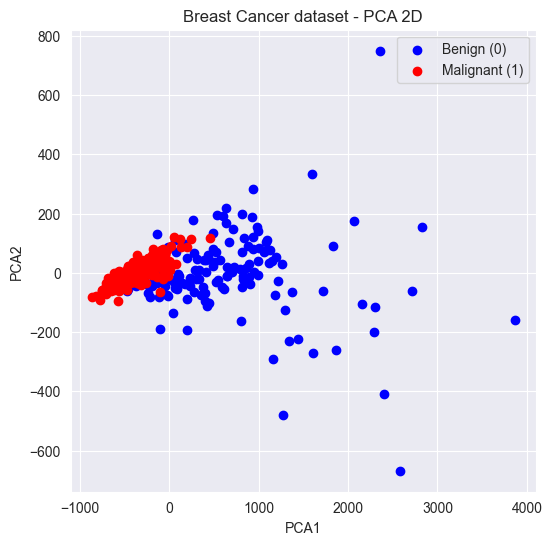

In [138]:
# PCA 2D cho trực quan
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Vẽ dữ liệu train với 2 lớp màu khác nhau
plt.figure(figsize=(6,6))
plt.scatter(X_train_2d[y_train==0,0], X_train_2d[y_train==0,1], color='blue', label='Benign (0)')
plt.scatter(X_train_2d[y_train==1,0], X_train_2d[y_train==1,1], color='red', label='Malignant (1)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Breast Cancer dataset - PCA 2D')
plt.legend()
plt.show()


Phân loại bằng Logistic Regression

In [139]:
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_train_log = log_model.predict(X_train)
y_pred_test_log = log_model.predict(X_test)

# So sánh với Perceptron
print("Logistic Regression - Train Accuracy:", accuracy_score(y_train, y_pred_train_log))
print("Logistic Regression - Test Accuracy:", accuracy_score(y_test, y_pred_test_log))
print("Precision:", precision_score(y_test, y_pred_test_log))
print("Recall:", recall_score(y_test, y_pred_test_log))


Logistic Regression - Train Accuracy: 0.9597989949748744
Logistic Regression - Test Accuracy: 0.9766081871345029
Precision: 0.9905660377358491
Recall: 0.9722222222222222


/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Giảm số chiều dữ liệu xuống 2D và hiển thị

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


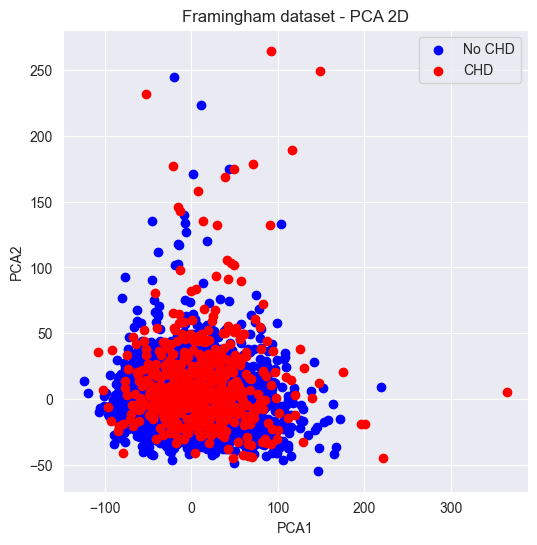

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Đọc dữ liệu
df = pd.read_csv('/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab8/framingham.csv')

# Xem các cột
print(df.columns)

# Loại bỏ các cột không cần thiết, hoặc xử lý missing
df = df.dropna()  # đơn giản loại bỏ missing, hoặc có thể dùng fillna

# Tách X và y
X = df.drop('TenYearCHD', axis=1).values  # các đặc trưng
y = df['TenYearCHD'].values               # nhãn 0/1

# Giảm chiều xuống 2D
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

# Hiển thị trực quan dữ liệu
plt.figure(figsize=(6,6))
plt.scatter(X_2d[y==0,0], X_2d[y==0,1], color='blue', label='No CHD')
plt.scatter(X_2d[y==1,0], X_2d[y==1,1], color='red', label='CHD')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Framingham dataset - PCA 2D')
plt.legend()
plt.show()


Xử lý dữ liệu và chia train/validation

In [141]:
# Chia train/validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Thêm bias cho Perceptron
X_train_bias = np.concatenate((np.ones((X_train.shape[0],1)), X_train), axis=1)
X_val_bias = np.concatenate((np.ones((X_val.shape[0],1)), X_val), axis=1)


Phân loại bằng Perceptron

In [142]:
# Hàm Perceptron
def fit_perceptron(X, y, lr=0.01, epochs=100):
    y_new = np.where(y==0, -1, 1)
    w = np.zeros(X.shape[1])
    for epoch in range(epochs):
        for i in range(len(y)):
            if y_new[i] * np.dot(X[i], w) <= 0:
                w += lr * y_new[i] * X[i]
    return w

def predict_perceptron(X, w):
    return np.where(np.sign(np.dot(X, w))==-1, 0, 1)

# Huấn luyện Perceptron
w_perceptron = fit_perceptron(X_train_bias, y_train)

# Dự đoán
y_pred_train = predict_perceptron(X_train_bias, w_perceptron)
y_pred_val = predict_perceptron(X_val_bias, w_perceptron)

# Đánh giá
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Perceptron - Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Perceptron - Validation Accuracy:", accuracy_score(y_val, y_pred_val))
print("Precision:", precision_score(y_val, y_pred_val))
print("Recall:", recall_score(y_val, y_pred_val))

print("Hệ số mô hình (w):", w_perceptron)


Perceptron - Train Accuracy: 0.8507229386479094
Perceptron - Validation Accuracy: 0.8413855970829535
Precision: 0.0
Recall: 0.0
Hệ số mô hình (w): [-15.38   16.63    9.72  -26.47    4.92    8.54    9.12    4.49   40.61
   6.15   -1.18    7.395 -10.    -13.453  -7.62   -2.8  ]


/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Phân loại bằng Logistic Regression

In [143]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_train_log = log_model.predict(X_train)
y_pred_val_log = log_model.predict(X_val)

# Đánh giá
print("Logistic Regression - Train Accuracy:", accuracy_score(y_train, y_pred_train_log))
print("Logistic Regression - Validation Accuracy:", accuracy_score(y_val, y_pred_val_log))
print("Precision:", precision_score(y_val, y_pred_val_log))
print("Recall:", recall_score(y_val, y_pred_val_log))
print("Hệ số Logistic:", log_model.coef_)


Logistic Regression - Train Accuracy: 0.8554122704181321
Logistic Regression - Validation Accuracy: 0.8441203281677302
Precision: 0.5555555555555556
Recall: 0.08620689655172414
Hệ số Logistic: [[ 4.65897227e-01  6.28956682e-02 -1.38329855e-02  1.78280793e-01
   1.94719238e-02  5.36341958e-01  1.71348202e+00  7.28041169e-02
   9.22963322e-01  2.28856264e-03  1.83527198e-02 -1.71111618e-03
  -1.43230291e-02 -9.51966941e-03  2.43453221e-03]]


/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Phân loại bằng Naïve Bayes

In [144]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred_train_nb = nb_model.predict(X_train)
y_pred_val_nb = nb_model.predict(X_val)

# Đánh giá
print("Naive Bayes - Train Accuracy:", accuracy_score(y_train, y_pred_train_nb))
print("Naive Bayes - Validation Accuracy:", accuracy_score(y_val, y_pred_val_nb))
print("Precision:", precision_score(y_val, y_pred_val_nb))
print("Recall:", recall_score(y_val, y_pred_val_nb))


Naive Bayes - Train Accuracy: 0.8288393903868698
Naive Bayes - Validation Accuracy: 0.8122151321786691
Precision: 0.3333333333333333
Recall: 0.1839080459770115


Thực hiện lại với dữ liệu giảm chiều (2D)

In [145]:
# PCA 2D
pca2 = PCA(n_components=2)
X_train_2d = pca2.fit_transform(X_train)
X_val_2d = pca2.transform(X_val)

# Thêm bias cho Perceptron
X_train_2d_bias = np.concatenate((np.ones((X_train_2d.shape[0],1)), X_train_2d), axis=1)
X_val_2d_bias = np.concatenate((np.ones((X_val_2d.shape[0],1)), X_val_2d), axis=1)

# Perceptron trên 2D
w_perceptron_2d = fit_perceptron(X_train_2d_bias, y_train)
y_pred_val_2d = predict_perceptron(X_val_2d_bias, w_perceptron_2d)
print("Perceptron (2D) - Validation Accuracy:", accuracy_score(y_val, y_pred_val_2d))

# Logistic trên 2D
log_model_2d = LogisticRegression(max_iter=1000)
log_model_2d.fit(X_train_2d, y_train)
y_pred_val_log_2d = log_model_2d.predict(X_val_2d)
print("Logistic (2D) - Validation Accuracy:", accuracy_score(y_val, y_pred_val_log_2d))

# Naive Bayes trên 2D
nb_model_2d = GaussianNB()
nb_model_2d.fit(X_train_2d, y_train)
y_pred_val_nb_2d = nb_model_2d.predict(X_val_2d)
print("Naive Bayes (2D) - Validation Accuracy:", accuracy_score(y_val, y_pred_val_nb_2d))


Perceptron (2D) - Validation Accuracy: 0.7547857793983591
Logistic (2D) - Validation Accuracy: 0.8422971741112124
Naive Bayes (2D) - Validation Accuracy: 0.8386508659981768


Nhận xét:
Khi giảm chiều xuống 2D:
Perceptron chịu ảnh hưởng khá nhiều (do đường phân chia tuyến tính trở nên hạn chế).
Logistic Regression vẫn ổn định hơn (dựa trên xác suất).
Naïve Bayes ít bị ảnh hưởng nếu dữ liệu vẫn tuân theo giả định Gaussian.

VÍ DỤ 5

   CustomerID  Shopping Basket  Gender  Age         Store Type  \
0    20358063            48.81    Male   26  Convenient Stores   
1    24635139            33.44  Female   33         Superstore   
2    27584479           131.57    Male   56             Online   
3    28008212            20.02    Male   27  Convenient Stores   
4    29130973            95.54  Female   55             Online   

   Value Products  Brand Products  Top Fresco Products  
0               8               2                    1  
1               6               5                    1  
2              35               8                   12  
3               0               1                    1  
4              38              18                   20  

--- Yêu cầu 1: Hồi quy tuyến tính ---
Mean Squared Error (MSE): 295.9983609515463
R-squared (R2): 0.8419264456919644
Hệ số của mô hình: [-2.61195353  0.07822874  8.71253319  0.99442134  1.03395133  2.44239648]
Hệ số chặn (intercept): 7.66734229827518


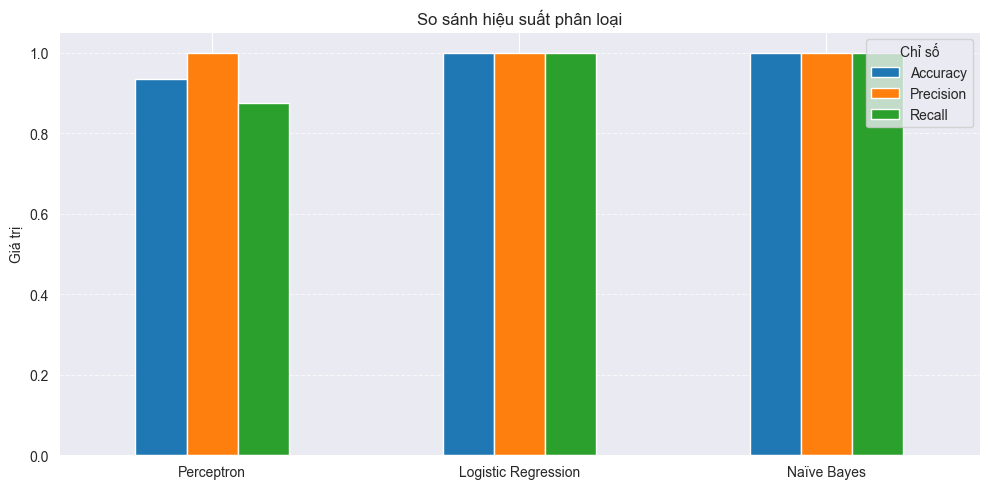


--- Yêu cầu 2: Phân loại ---
Perceptron:
Accuracy: 0.9333, Precision: 1.0000, Recall: 0.8750
Hệ số của Perceptron: [[-1874.33607675   -14.74688938   -29.97582844   984.31842068
     76.86915251   176.08739103     6.08693046]]

Logistic Regression:
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000
Hệ số của Logistic Regression: [[ 0.27493706  0.09229302  0.95184175  0.33188493  0.54348448 -0.07898914]]

Naïve Bayes:
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000


In [149]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Đọc dữ liệu
df = pd.read_csv("/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab8/Analysis-Portfolio-Task-Data.csv")
print(df.head())

#  Chuẩn hóa dữ liệu và hồi quy tuyến tính

# Chuẩn hóa dữ liệu

df = df.drop('CustomerID', axis=1)

# Chuyển Gender thành số: Male=1, Female=0
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Chuyển Store Type thành số: Convenient Stores=0, Superstore=1, Online=2
df['Store Type'] = df['Store Type'].map({'Convenient Stores': 0, 'Superstore': 1, 'Online': 2})

# Tách đặc trưng và nhãn
X = df.drop('Shopping Basket', axis=1).values
y = df['Shopping Basket'].values

# Chia dữ liệu: 60 bản ghi đầu là training, 15 bản ghi cuối là validation
X_train = X[:60]
X_test = X[60:]
y_train = y[:60]
y_test = y[60:]

# Hồi quy tuyến tính
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Dự đoán trên tập validation
y_pred = lin_reg.predict(X_test)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# In kết quả
print("\n--- Yêu cầu 1: Hồi quy tuyến tính ---")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print("Hệ số của mô hình:", lin_reg.coef_)
print("Hệ số chặn (intercept):", lin_reg.intercept_)

# --- Yêu cầu 2: Phân loại ---

# Chuyển Shopping Basket thành nhãn phân loại: >50 là 1, <=50 là -1 (cho Perceptron) hoặc 0 (cho Logistic và NB)
y_class = np.where(df['Shopping Basket'] > 50, 1, -1)
y_class_logistic_nb = np.where(df['Shopping Basket'] > 50, 1, 0)  # Logistic và NB dùng nhãn 0/1

# Chia dữ liệu phân loại
y_train_class = y_class[:60]
y_test_class = y_class[60:]
y_train_class_logistic_nb = y_class_logistic_nb[:60]
y_test_class_logistic_nb = y_class_logistic_nb[60:]

# Thêm cột bias cho Perceptron
x0_train = np.ones((X_train.shape[0], 1))
x0_test = np.ones((X_test.shape[0], 1))
X_train_perceptron = np.concatenate((x0_train, X_train), axis=1)
X_test_perceptron = np.concatenate((x0_test, X_test), axis=1)

# 2a. Perceptron
def h(w, x):
    return np.sign(np.dot(w.T, x))

def has_converged(X, y, w):
    return np.array_equal(h(w, X), y)

def perceptron(X, y, w_init, max_iter=1000):
    w = [w_init]
    N = X.shape[1]
    mis_points = []
    iter_count = 0
    while iter_count < max_iter:
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(X.shape[0], 1)
            yi = y[mix_id[i]]
            if h(w[-1], xi)[0] != yi:
                mis_points.append(mix_id[i])
                w_new = w[-1] + yi * xi
                w.append(w_new)
        if has_converged(X, y, w[-1]):
            break
        iter_count += 1
    return (w, mis_points)

d = X_train_perceptron.shape[1]
w_init = np.random.randn(d, 1)
(w, m) = perceptron(X_train_perceptron.T, y_train_class, w_init)
w_final = w[-1]

y_pred_perceptron = np.array([h(w_final, x.reshape(-1, 1))[0] for x in X_test_perceptron])
acc_perceptron = accuracy_score(y_test_class, y_pred_perceptron)
precision_perceptron = precision_score(y_test_class, y_pred_perceptron)
recall_perceptron = recall_score(y_test_class, y_pred_perceptron)

# 2b. Logistic Regression
logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train, y_train_class_logistic_nb)

y_pred_logistic = logistic.predict(X_test)
acc_logistic = accuracy_score(y_test_class_logistic_nb, y_pred_logistic)
precision_logistic = precision_score(y_test_class_logistic_nb, y_pred_logistic)
recall_logistic = recall_score(y_test_class_logistic_nb, y_pred_logistic)

# 2c. Naïve Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train_class_logistic_nb)

y_pred_nb = naive_bayes.predict(X_test)
acc_nb = accuracy_score(y_test_class_logistic_nb, y_pred_nb)
precision_nb = precision_score(y_test_class_logistic_nb, y_pred_nb)
recall_nb = recall_score(y_test_class_logistic_nb, y_pred_nb)

# So sánh các mô hình phân loại
models = ['Perceptron', 'Logistic Regression', 'Naïve Bayes']
metrics = {
    'Accuracy': [acc_perceptron, acc_logistic, acc_nb],
    'Precision': [precision_perceptron, precision_logistic, precision_nb],
    'Recall': [recall_perceptron, recall_logistic, recall_nb]
}

df_metrics = pd.DataFrame(metrics, index=models)
plt.figure(figsize=(10, 5))
df_metrics.plot(kind='bar', ax=plt.gca())
plt.title('So sánh hiệu suất phân loại')
plt.ylabel('Giá trị')
plt.xticks(rotation=0)
plt.legend(title='Chỉ số')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# In kết quả phân loại
print("\n--- Yêu cầu 2: Phân loại ---")
print("Perceptron:")
print(f"Accuracy: {acc_perceptron:.4f}, Precision: {precision_perceptron:.4f}, Recall: {recall_perceptron:.4f}")
print("Hệ số của Perceptron:", w_final.T)

print("\nLogistic Regression:")
print(f"Accuracy: {acc_logistic:.4f}, Precision: {precision_logistic:.4f}, Recall: {recall_logistic:.4f}")
print("Hệ số của Logistic Regression:", logistic.coef_)

print("\nNaïve Bayes:")
print(f"Accuracy: {acc_nb:.4f}, Precision: {precision_nb:.4f}, Recall: {recall_nb:.4f}")